<a href="https://colab.research.google.com/github/JaperTai77/Colab-notebook/blob/main/spotify_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library and Connect to Spotify

In [1]:
!pip install --target=$nb_path spotipy

     |████████████████████████████████| 143kB 6.6MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# spotify_client_id = ''
# spotify_client_secret  = ''

client_credentials_manager = SpotifyClientCredentials(
    client_id=spotify_client_id,
    client_secret=spotify_client_secret
)

sp = spotipy.Spotify(
    client_credentials_manager=client_credentials_manager
)

In [3]:
import pandas as pd
from pandas.io.json import json_normalize

## Find an Artist

In [25]:
def spotify_artist(url = 'spotify:artist:246dkjvS1zLTtiykXe5h60'):
  art = sp.artist(url)
  artist_name = art['name'] 
  artist_id = art['id']
  followers = art['followers']['total']
  popularity_rank = art['popularity']
  art_list = [artist_name, artist_id, followers,popularity_rank]
  artist_info = pd.DataFrame(data = [art_list], columns = ['artist_name', 'artist_id', 'followers', 'popularity'])
  return artist_info

In [26]:
print(spotify_artist())

   artist_name               artist_id  followers  popularity
0  Post Malone  246dkjvS1zLTtiykXe5h60   31592018          94


In [29]:
print(spotify_artist(url = 'spotify:artist:7n2wHs1TKAczGzO7Dd2rGr'))

    artist_name               artist_id  followers  popularity
0  Shawn Mendes  7n2wHs1TKAczGzO7Dd2rGr   31838896          91


In [30]:
print(spotify_artist(url = 'spotify:artist:6T5tfhQCknKG4UnH90qGnz'))

  artist_name               artist_id  followers  popularity
0        DNCE  6T5tfhQCknKG4UnH90qGnz    3622699          72


## Find Top Songs

In [43]:
def songs(url = 'spotify:artist:246dkjvS1zLTtiykXe5h60'):
  artist_info = spotify_artist(url = url)
  artist_top = sp.artist_top_tracks(artist_info['artist_id'][0])
  top_track_info = pd.json_normalize(artist_top['tracks'], 
                                     record_path=['artists'],
                                     meta = ['id', 'name'], 
                                     record_prefix = 'artist_', 
                                     meta_prefix = 'track_', 
                                     sep = '_')
  top_track_info = top_track_info[['artist_name', 'artist_id', 'track_id', 'track_name']]
  return(top_track_info[top_track_info['artist_name'].isin(artist_info['artist_name'])])

In [42]:
top = songs()
top

,artist_name,artist_id,track_id,track_name
0,Post Malone,246dkjvS1zLTtiykXe5h60,21jGcNKet2qwijlDFuPiPb,Circles
1,Post Malone,246dkjvS1zLTtiykXe5h60,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage)
3,Post Malone,246dkjvS1zLTtiykXe5h60,0RiRZpuVRbi7oqRdSMwhQY,Sunflower - Spider-Man: Into the Spider-Verse
5,Post Malone,246dkjvS1zLTtiykXe5h60,7dt6x5M1jzdTEt8oCbisTK,Better Now
6,Post Malone,246dkjvS1zLTtiykXe5h60,7xQAfvXzm3AkraOtGPWIZg,Wow.
7,Post Malone,246dkjvS1zLTtiykXe5h60,75ZvA4QfFiZvzhj2xkaWAh,I Fall Apart
8,Post Malone,246dkjvS1zLTtiykXe5h60,3a1lNhkSLSkpJE4MSHpDu9,Congratulations
10,Post Malone,246dkjvS1zLTtiykXe5h60,0t3ZvGKlmYmVsDzBJAXK8C,Goodbyes (feat. Young Thug)
12,Post Malone,246dkjvS1zLTtiykXe5h60,3SawmGBjjq8EOYZJV11cJm,Only Wanna Be With You - Pokémon 25 Version
13,Post Malone,246dkjvS1zLTtiykXe5h60,3swc6WTsr7rl9DqQKQA55C,Psycho (feat. Ty Dolla $ign)


In [ ]:
sp.tracks

In [44]:
def artist_songs(url = 'spotify:artist:246dkjvS1zLTtiykXe5h60'):
  artist_info = spotify_artist(url = url)
  artist_top = sp.artist_top_tracks(artist_info['artist_id'][0])
  top_track_info = pd.json_normalize(artist_top['tracks'], 
                                     record_path=['artists'],
                                     meta = ['id', 'name'], 
                                     record_prefix = 'artist_', 
                                     meta_prefix = 'track_', 
                                     sep = '_')
  top_track_info = top_track_info[['artist_name', 'artist_id', 'track_id', 'track_name']]
  top_track_info = top_track_info[top_track_info['artist_name'].isin(artist_info['artist_name'])]
  top_track_features = sp.audio_features(top_track_info['track_id'])
  top_track_features = pd.json_normalize(top_track_features)
  top_track_features = top_track_features.drop(columns = ['uri', 'track_href', 'analysis_url', 'type'])
  top_track_info = top_track_info.merge(top_track_features, left_on = 'track_id', right_on = 'id', how = 'left')
  top_track_info = top_track_info.merge(artist_info, left_on = 'artist_id', right_on= 'artist_id', how = 'left')
  return top_track_info

In [46]:
artist_songs()

,artist_name_x,artist_id,track_id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,artist_name_y,followers,popularity
0,Post Malone,246dkjvS1zLTtiykXe5h60,21jGcNKet2qwijlDFuPiPb,Circles,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,21jGcNKet2qwijlDFuPiPb,215280,4,Post Malone,31592018,94
1,Post Malone,246dkjvS1zLTtiykXe5h60,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),0.585,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0e7ipj03S05BNilyu5bRzt,218147,4,Post Malone,31592018,94
2,Post Malone,246dkjvS1zLTtiykXe5h60,0RiRZpuVRbi7oqRdSMwhQY,Sunflower - Spider-Man: Into the Spider-Verse,0.755,0.522,2,-4.368,1,0.0575,0.53300,0.000000,0.0685,0.925,89.960,0RiRZpuVRbi7oqRdSMwhQY,157560,4,Post Malone,31592018,94
3,Post Malone,246dkjvS1zLTtiykXe5h60,7dt6x5M1jzdTEt8oCbisTK,Better Now,0.680,0.578,10,-5.804,1,0.0400,0.33100,0.000000,0.1350,0.341,145.038,7dt6x5M1jzdTEt8oCbisTK,231267,4,Post Malone,31592018,94
4,Post Malone,246dkjvS1zLTtiykXe5h60,7xQAfvXzm3AkraOtGPWIZg,Wow.,0.829,0.539,11,-7.359,0,0.2080,0.13600,0.000002,0.1030,0.388,99.960,7xQAfvXzm3AkraOtGPWIZg,149547,4,Post Malone,31592018,94
5,Post Malone,246dkjvS1zLTtiykXe5h60,75ZvA4QfFiZvzhj2xkaWAh,I Fall Apart,0.556,0.538,8,-5.408,0,0.0382,0.06890,0.000000,0.1960,0.291,143.950,75ZvA4QfFiZvzhj2xkaWAh,223347,4,Post Malone,31592018,94
6,Post Malone,246dkjvS1zLTtiykXe5h60,3a1lNhkSLSkpJE4MSHpDu9,Congratulations,0.630,0.804,6,-4.183,1,0.0363,0.21500,0.000000,0.2530,0.492,123.146,3a1lNhkSLSkpJE4MSHpDu9,220293,4,Post Malone,31592018,94
7,Post Malone,246dkjvS1zLTtiykXe5h60,0t3ZvGKlmYmVsDzBJAXK8C,Goodbyes (feat. Young Thug),0.548,0.653,5,-3.875,1,0.0810,0.45600,0.000000,0.1030,0.163,150.068,0t3ZvGKlmYmVsDzBJAXK8C,174853,4,Post Malone,31592018,94
8,Post Malone,246dkjvS1zLTtiykXe5h60,3SawmGBjjq8EOYZJV11cJm,Only Wanna Be With You - Pokémon 25 Version,0.470,0.709,7,-4.563,1,0.0299,0.00124,0.001210,0.3020,0.247,98.036,3SawmGBjjq8EOYZJV11cJm,241360,4,Post Malone,31592018,94
9,Post Malone,246dkjvS1zLTtiykXe5h60,3swc6WTsr7rl9DqQKQA55C,Psycho (feat. Ty Dolla $ign),0.750,0.560,8,-8.094,1,0.1050,0.54600,0.000000,0.1110,0.459,140.060,3swc6WTsr7rl9DqQKQA55C,221440,4,Post Malone,31592018,94


In [47]:
artist_songs(url = 'spotify:artist:7n2wHs1TKAczGzO7Dd2rGr')

,artist_name_x,artist_id,track_id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,artist_name_y,followers,popularity
0,Shawn Mendes,7n2wHs1TKAczGzO7Dd2rGr,1HbA4N1MiOsPthALesGFR1,Monster (Shawn Mendes & Justin Bieber),0.640,0.392,2,-7.246,0,0.0574,0.0593,0.000000,0.0839,0.502,145.838,1HbA4N1MiOsPthALesGFR1,178994,4,Shawn Mendes,31838896,91
1,Shawn Mendes,7n2wHs1TKAczGzO7Dd2rGr,6ZuahEctZD6w75peme58hm,Wonder,0.442,0.631,1,-5.096,0,0.0500,0.1360,0.000023,0.1330,0.129,139.774,6ZuahEctZD6w75peme58hm,172693,4,Shawn Mendes,31838896,91
2,Shawn Mendes,7n2wHs1TKAczGzO7Dd2rGr,6v3KW9xbzN5yKLt9YKDYA2,Señorita,0.759,0.548,9,-6.049,0,0.0290,0.0392,0.000000,0.0828,0.749,116.967,6v3KW9xbzN5yKLt9YKDYA2,190800,4,Shawn Mendes,31838896,91
3,Shawn Mendes,7n2wHs1TKAczGzO7Dd2rGr,3QGsuHI8jO1Rx4JWLUh9jd,Treat You Better,0.444,0.819,10,-4.078,0,0.3410,0.1060,0.000000,0.1070,0.747,82.695,3QGsuHI8jO1Rx4JWLUh9jd,187973,4,Shawn Mendes,31838896,91
4,Shawn Mendes,7n2wHs1TKAczGzO7Dd2rGr,7JJmb5XwzOO8jgpou264Ml,There's Nothing Holdin' Me Back,0.866,0.813,11,-4.063,0,0.0554,0.3800,0.000000,0.0779,0.969,121.998,7JJmb5XwzOO8jgpou264Ml,199440,4,Shawn Mendes,31838896,91
5,Shawn Mendes,7n2wHs1TKAczGzO7Dd2rGr,0AS63m1wHv9n4VVRizK6Hc,Mercy,0.555,0.662,11,-4.952,0,0.0827,0.1250,0.000000,0.1110,0.356,148.128,0AS63m1wHv9n4VVRizK6Hc,208733,4,Shawn Mendes,31838896,91
6,Shawn Mendes,7n2wHs1TKAczGzO7Dd2rGr,2bT1PH7Cw3J9p3t7nlXCdh,If I Can't Have You,0.691,0.823,2,-4.197,1,0.0623,0.4870,0.000000,0.1340,0.870,123.935,2bT1PH7Cw3J9p3t7nlXCdh,191467,4,Shawn Mendes,31838896,91
7,Shawn Mendes,7n2wHs1TKAczGzO7Dd2rGr,5jsw9uXEGuKyJzs0boZ1bT,Stitches,0.752,0.754,1,-6.684,1,0.0615,0.0151,0.000000,0.0486,0.755,149.789,5jsw9uXEGuKyJzs0boZ1bT,206880,4,Shawn Mendes,31838896,91
8,Shawn Mendes,7n2wHs1TKAczGzO7Dd2rGr,2QZ7WLBE8h2y1Y5Fb8RYbH,In My Blood,0.622,0.712,5,-7.321,1,0.0660,0.0573,0.000000,0.1300,0.487,140.025,2QZ7WLBE8h2y1Y5Fb8RYbH,211360,4,Shawn Mendes,31838896,91
9,Shawn Mendes,7n2wHs1TKAczGzO7Dd2rGr,5LZtB6nxvjIhUoElp3Zqk0,Teach Me How To Love,0.592,0.885,9,-4.944,0,0.0807,0.0505,0.000002,0.0843,0.731,98.991,5LZtB6nxvjIhUoElp3Zqk0,202357,4,Shawn Mendes,31838896,91


### Get songs from different artists

In [64]:
art = ['spotify:artist:3gIRvgZssIb9aiirIg0nI3','spotify:artist:4KJ6jujcNPzOyhdNoiNftp','spotify:artist:7n2wHs1TKAczGzO7Dd2rGr',
       'spotify:artist:6eUKZXaKkcviH0Ku9w2n3V','spotify:artist:6VuMaDnrHyPL1p4EHjYLi7','spotify:artist:04gDigrS5kc9YWfZHwBETP',
       'spotify:artist:1uU7g3DNSbsu0QjSEqZtEd','spotify:artist:6TIYQ3jFPwQSRmorSezPxX','spotify:artist:66CXWjxzNUsdJxJ2JdwvnR',
       'spotify:artist:1uNFoZAHBGtllmzznpCI3s','spotify:artist:06HL4z0CvFAxyc27GXpf02','spotify:artist:1yxSLGMDHlW21z4YXirZDS',
       'spotify:artist:4Uc8Dsxct0oMqx0P6i60ea','spotify:artist:0du5cEVh5yTK9QJze8zA0C','spotify:artist:1Zi1c8sWZTy5rDiN3lAuEj',
       'spotify:artist:5KsRA81UaMVKvLNiwDySfp','spotify:artist:5SHxzwjek1Pipl1Yk11UHv','spotify:artist:02kJSzxNuaWGqwubyUba0Z']
full = artist_songs()
for i in art:
  full = pd.concat([artist_songs(url = i),full]).reset_index().drop(columns = 'index')
full.head()

,artist_name_x,artist_id,track_id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,artist_name_y,followers,popularity
0,G-Eazy,02kJSzxNuaWGqwubyUba0Z,0tQmgwFKw9069z1BXniOiA,Provide (feat. Chris Brown & Mark Morrison),0.652,0.803,9,-4.116,0,0.2380,0.01650,0.0,0.3070,0.661,95.025,0tQmgwFKw9069z1BXniOiA,186350,4,G-Eazy,4783731,85
1,G-Eazy,02kJSzxNuaWGqwubyUba0Z,0JjM9bKm4wrwohMslcm892,Still Be Friends (feat. Tory Lanez & Tyga),0.803,0.759,7,-4.692,0,0.0494,0.00509,0.0,0.0921,0.284,104.000,0JjM9bKm4wrwohMslcm892,213308,4,G-Eazy,4783731,85
2,G-Eazy,02kJSzxNuaWGqwubyUba0Z,5k38wzpLb15YgncyWdTZE4,Him & I (with Halsey),0.589,0.731,2,-6.343,1,0.0868,0.05340,0.0,0.3080,0.191,87.908,5k38wzpLb15YgncyWdTZE4,268867,4,G-Eazy,4783731,85
3,G-Eazy,02kJSzxNuaWGqwubyUba0Z,40YcuQysJ0KlGQTeGUosTC,"Me, Myself & I",0.756,0.674,0,-6.518,0,0.0959,0.01840,0.0,0.1580,0.389,111.995,40YcuQysJ0KlGQTeGUosTC,251467,4,G-Eazy,4783731,85
4,G-Eazy,02kJSzxNuaWGqwubyUba0Z,2DQ1ITjI0YoLFzuADN1ZBW,No Limit,0.838,0.771,1,-3.791,1,0.2440,0.01170,0.0,0.0853,0.405,175.957,2DQ1ITjI0YoLFzuADN1ZBW,245387,4,G-Eazy,4783731,85


## Plot

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

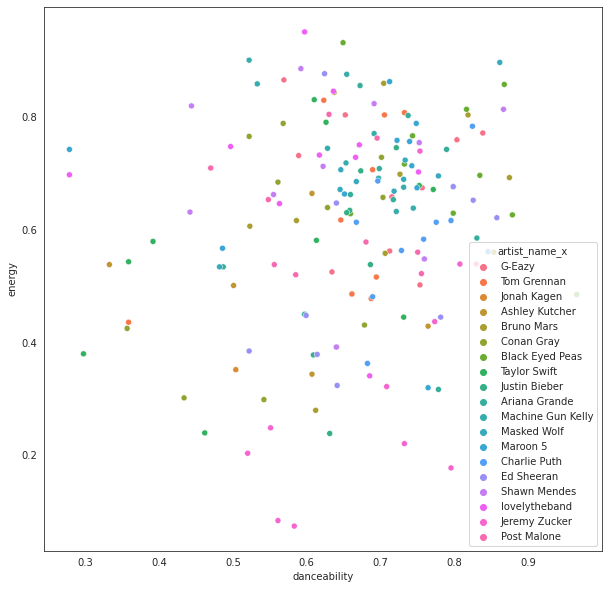

In [65]:
sns.set_style('white')
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'danceability',y = 'energy', hue = 'artist_name_x',data = full)
plt.show()

In [69]:
artist_type = full.groupby('artist_name_x').agg({'danceability':['mean'],
                                 'tempo':['mean'],
                                 'duration_ms':['mean'],
                                 'popularity':['mean']}).reset_index()
artist_type.columns = ['artist_name_x','danceability','tempo','duration_ms','popularity']
artist_type.head()

,artist_name_x,danceability,tempo,duration_ms,popularity
0,Ariana Grande,0.6964,127.6584,181714.9,97
1,Ashley Kutcher,0.5624,116.1036,195506.6,60
2,Black Eyed Peas,0.7941,119.1936,252642.0,88
3,Bruno Mars,0.7039,119.2337,217977.9,92
4,Charlie Puth,0.7459,101.3646,189460.6,83


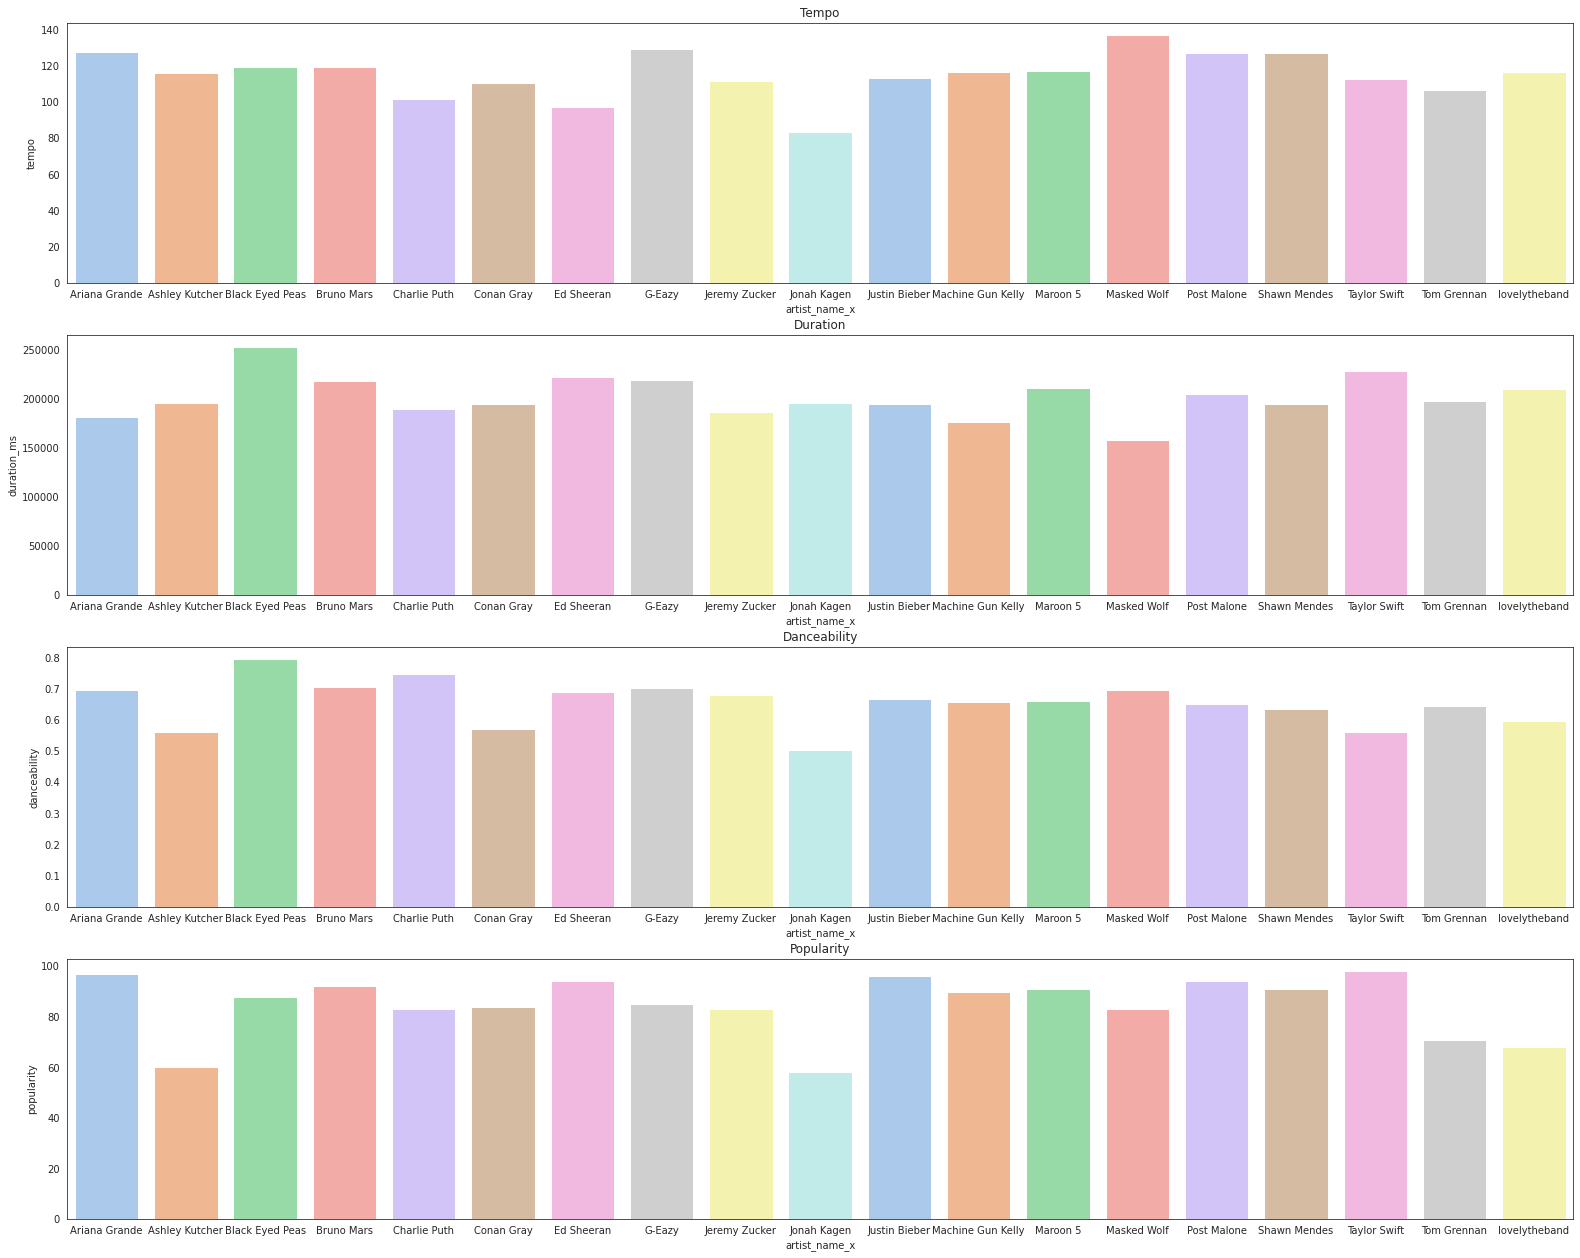

In [84]:
plt.figure(figsize = (27,22))
plt.subplot(4,1,1)
sns.barplot(x = 'artist_name_x',y = 'tempo',data = artist_type,palette='pastel').set_title('Tempo')
plt.subplot(4,1,2)
sns.barplot(x = 'artist_name_x',y = 'duration_ms',data = artist_type,palette='pastel').set_title('Duration')
plt.subplot(4,1,3)
sns.barplot(x = 'artist_name_x',y = 'danceability',data = artist_type,palette='pastel').set_title('Danceability')
plt.subplot(4,1,4)
sns.barplot(x = 'artist_name_x',y = 'popularity',data = artist_type,palette='pastel').set_title('Popularity')
plt.show()

## Clustering

### K-mean clustering

In [86]:
X = full[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

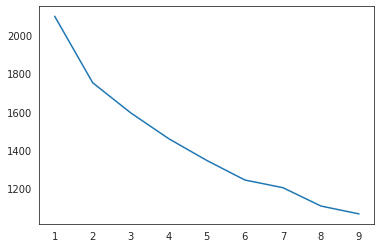

In [90]:
from sklearn.cluster import KMeans
k = []
for i in range(1,10):
    km = KMeans(n_clusters = i, init = 'k-means++')
    km.fit(X)
    k.append(km.inertia_)
    
plt.plot(range(1, 10), k)

In [96]:
def kmean(x,n):
    from sklearn.cluster import KMeans
    km = KMeans(n_clusters = n, init = 'k-means++')
    y_km = km.fit_predict(x)
    return(y_km)
y = kmean(X,2)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int32)

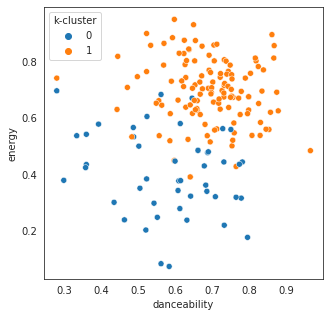

In [112]:
full['k-cluster'] = y
sns.set_style('white')
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'danceability',y = 'energy', hue = 'k-cluster',data = full)
plt.show()

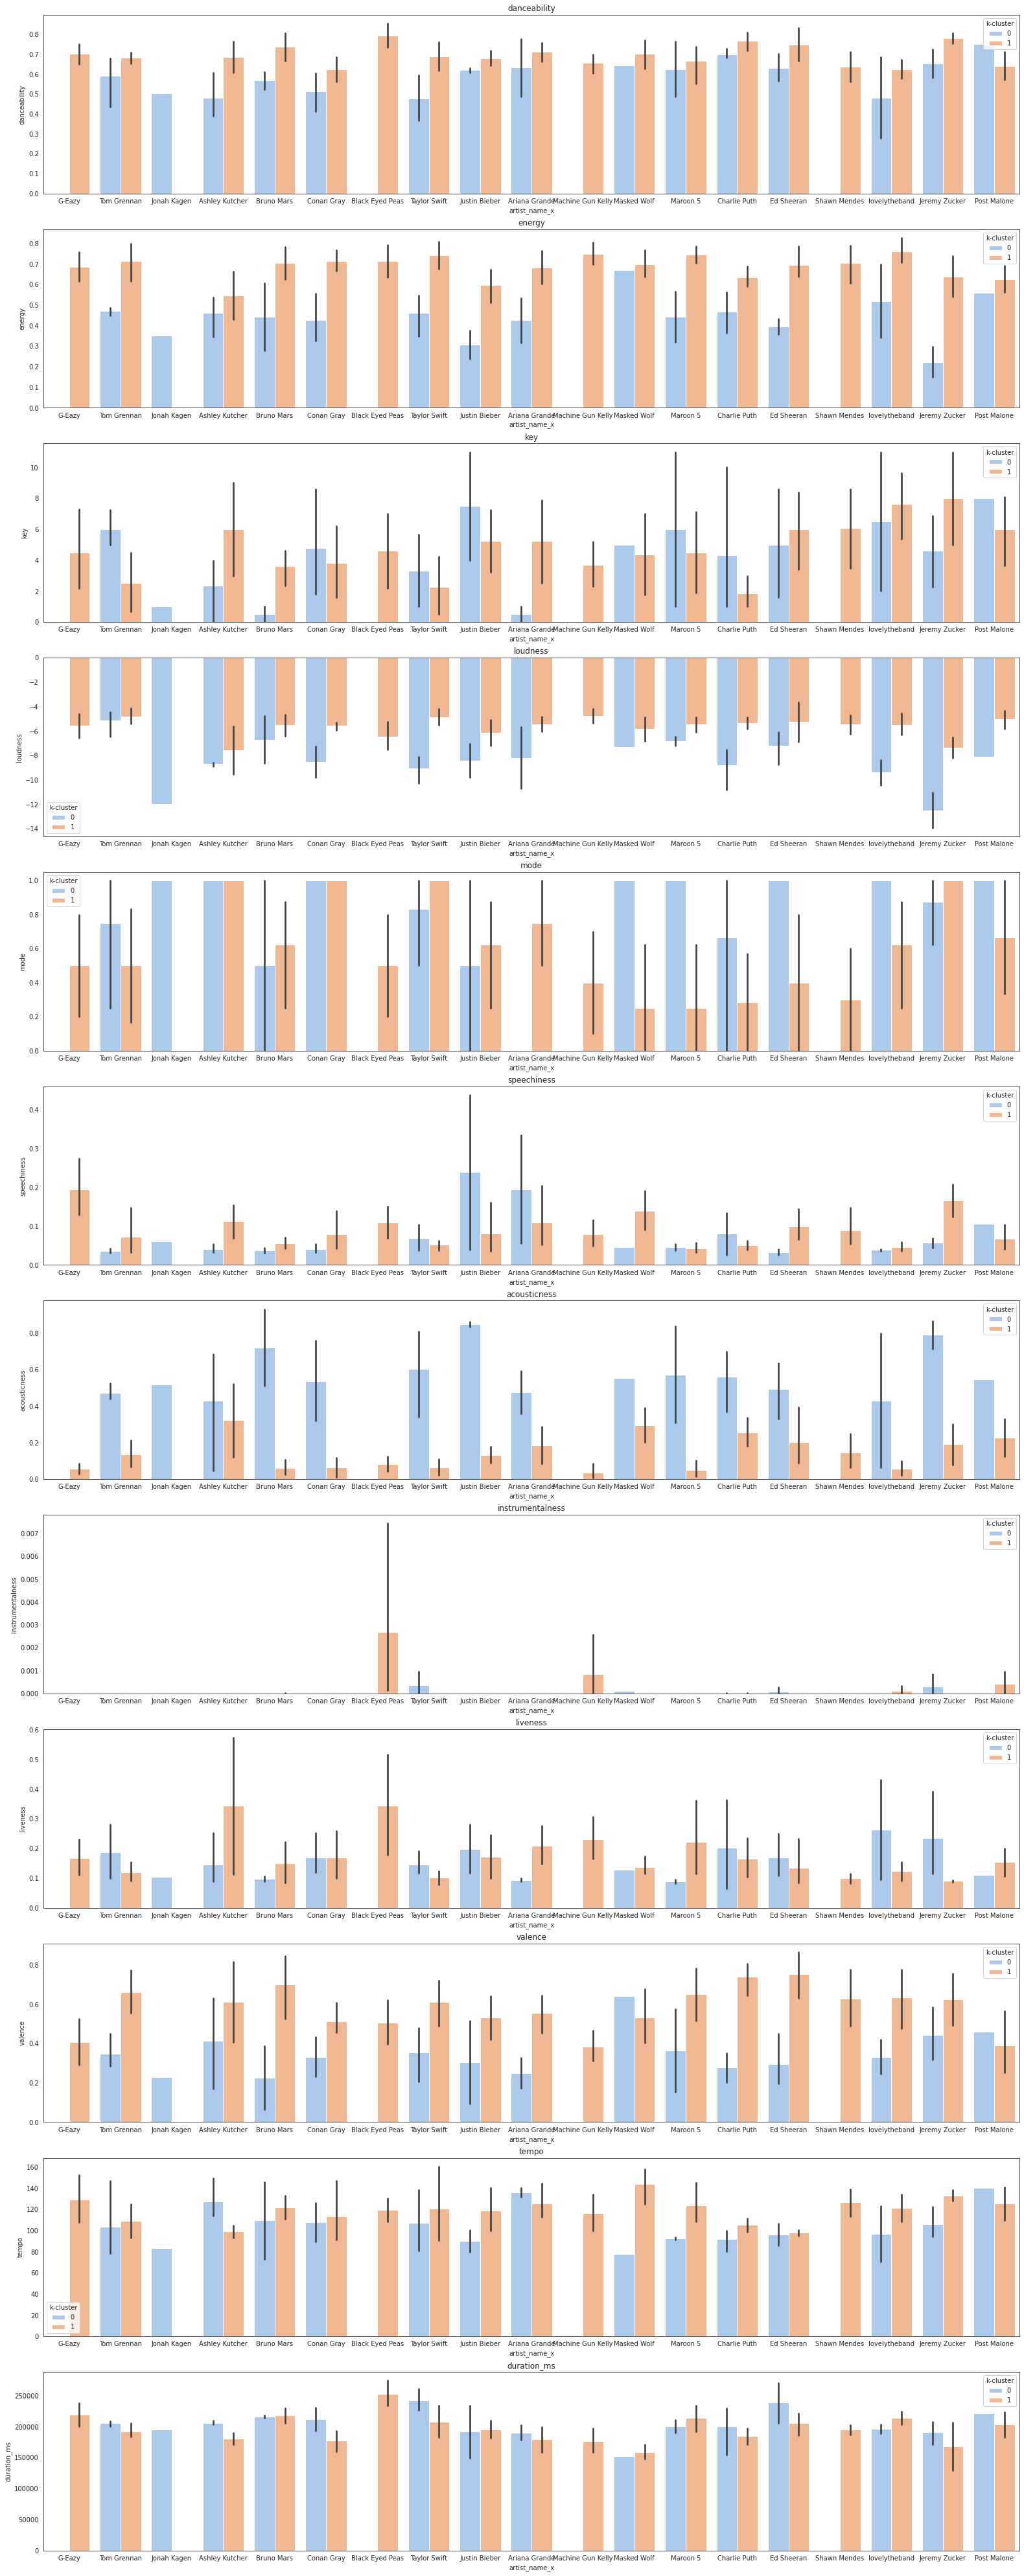

In [121]:
col = ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']
plt.figure(figsize = (27,6*len(col)))
for i,c in enumerate(col):
  plt.subplot(len(col),1,i+1)
  sns.barplot(x = 'artist_name_x',y = c,data = full,hue = 'k-cluster',palette='pastel').set_title(c)
plt.show()


### Hierarchy Clustering

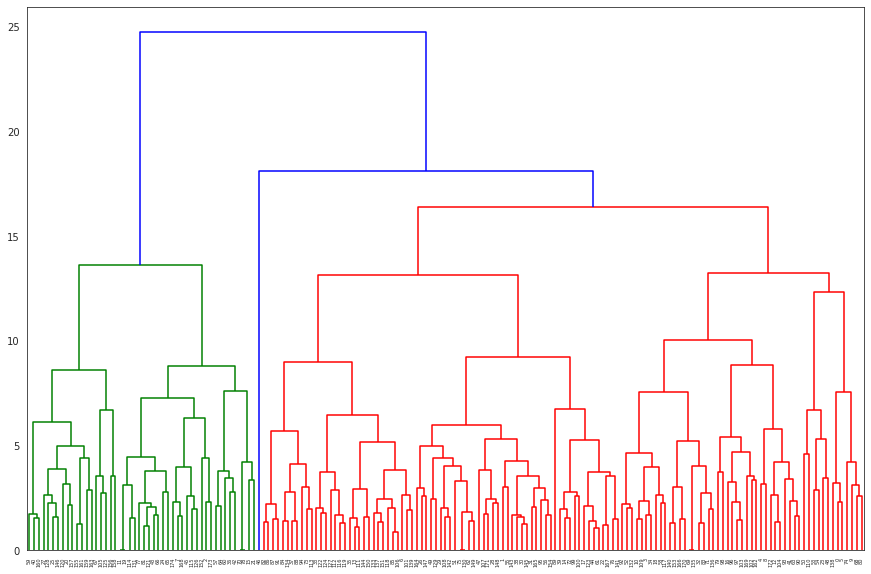

In [117]:
import scipy.cluster.hierarchy as sch
fig, ax = plt.subplots(figsize = (15,10))
ax = dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'), ax = ax)
plt.show()

In [122]:
def hc(x,n):
    from sklearn.cluster import AgglomerativeClustering
    hc = AgglomerativeClustering(n_clusters = n, affinity = 'euclidean', linkage = 'ward')
    
    y_hc = hc.fit_predict(x)
    return(y_hc)
y = hc(X,2)


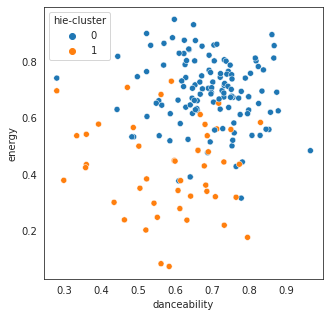

In [123]:
full['hie-cluster'] = y
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'danceability',y = 'energy', hue = 'hie-cluster',data = full)
plt.show()

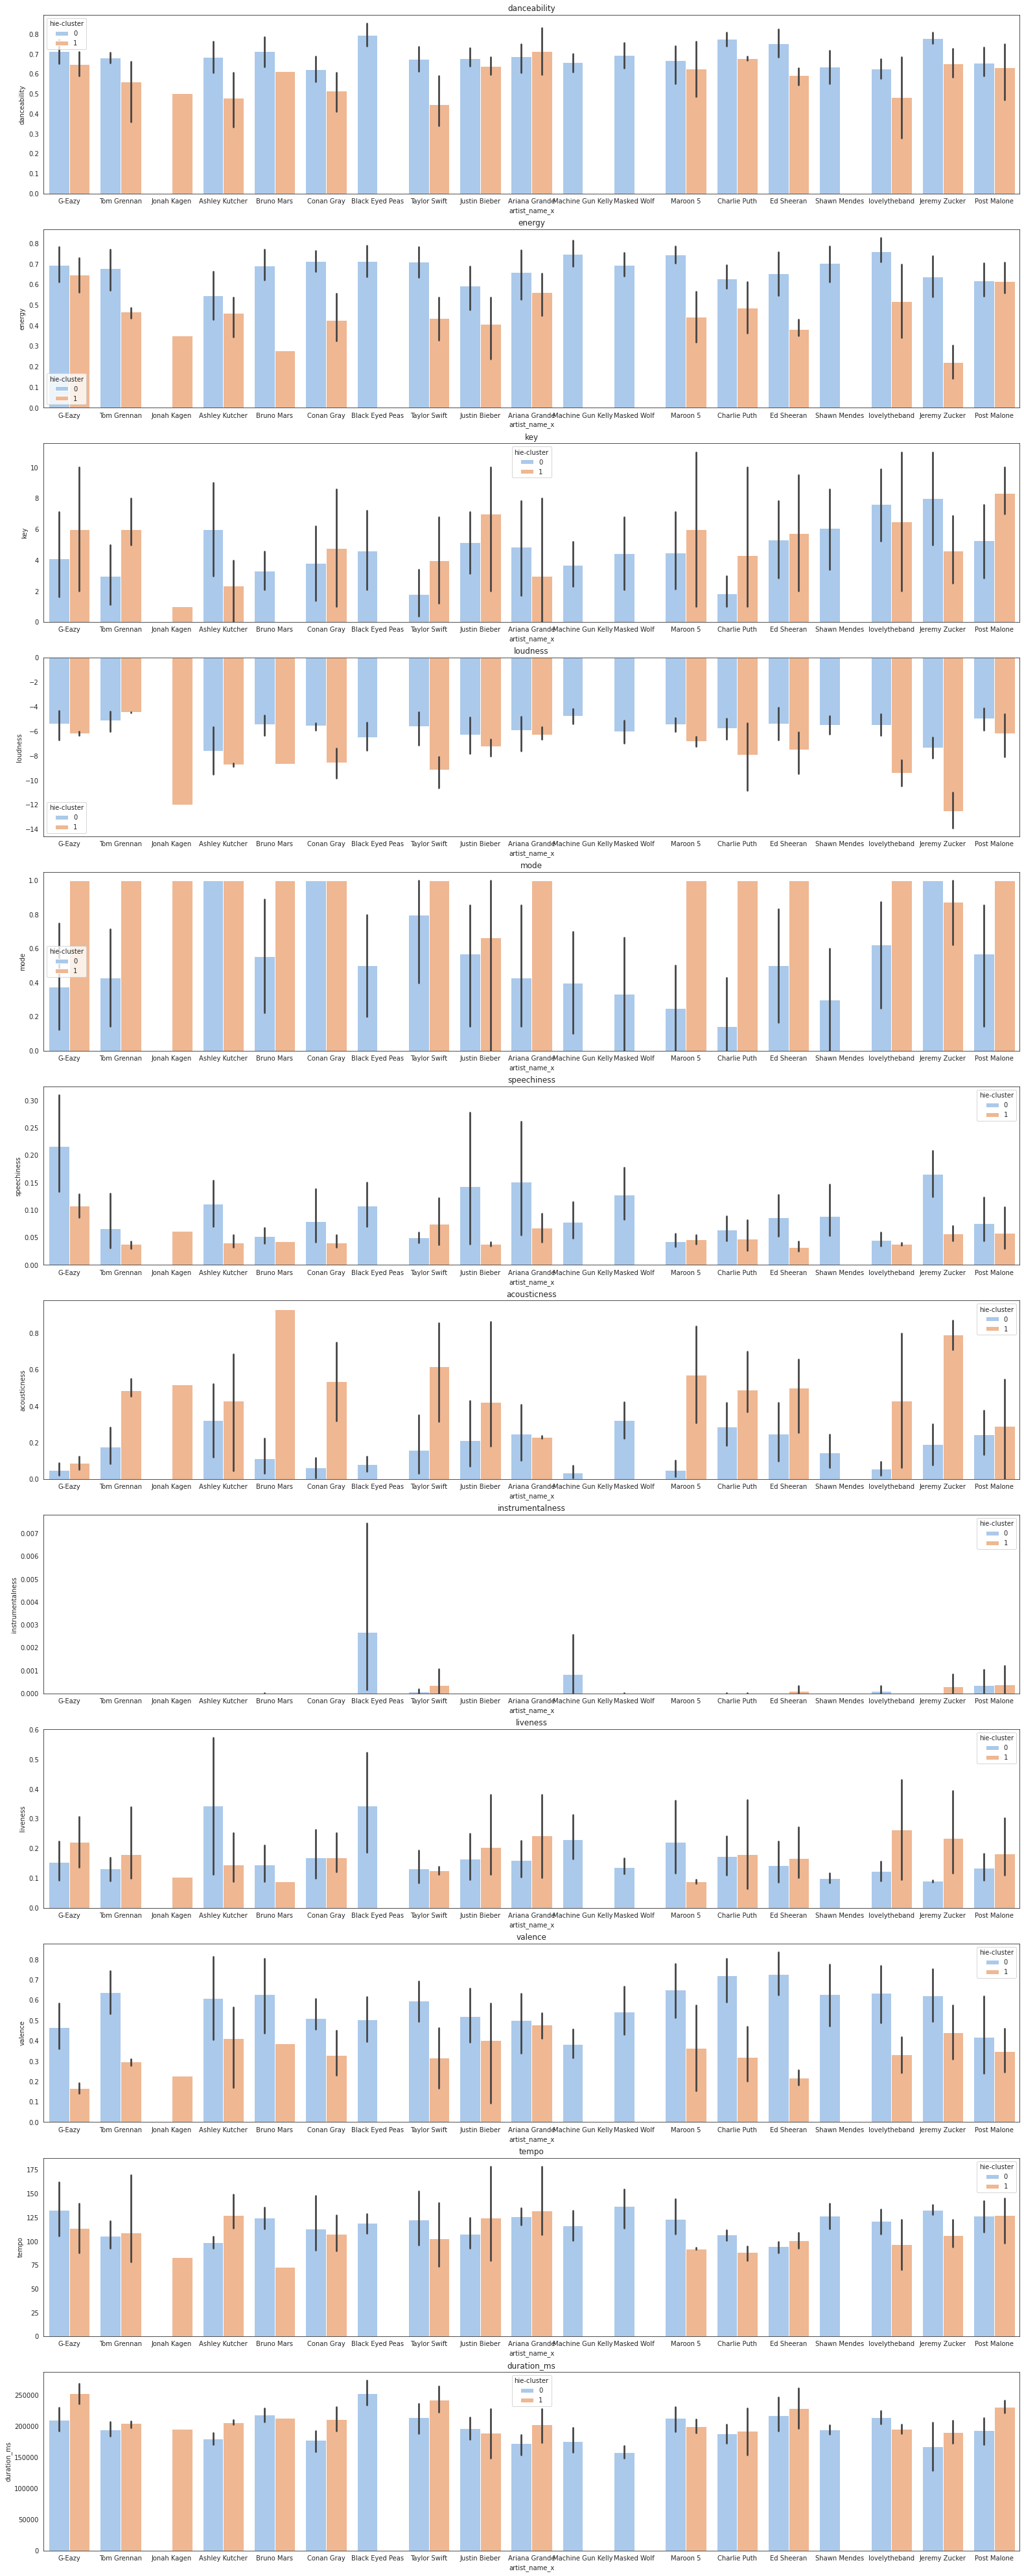

In [124]:
plt.figure(figsize = (27,6*len(col)))
for i,c in enumerate(col):
  plt.subplot(len(col),1,i+1)
  sns.barplot(x = 'artist_name_x',y = c,data = full,hue = 'hie-cluster',palette='pastel').set_title(c)
plt.show()
